In [8]:
import matplotlib.pyplot as plt
import numpy as np

rate = 48000

data = np.load("ivsense_c2_-16dB_sine.npy")
off = 4000
samples = len(data[off:,0])
i = data[off:off+samples,0 + 2 * 2]
v = data[off:off+samples,1 + 2 * 2]

i = i / 32767 * 3.75
v = v / 32767 * 14

rate = 48000

Power: 0.21645906868379441
Vrms: 0.9365919026769476
Irms: 0.23113287092610252
Rstart: 3.867440751390066
Rend: 4.088424946024902
Offset: 0.43598222498471273
tvc: 52.37566963076274
tmag: 44.98119649082831
tvc_tgt: 52.421605564966036
tmag_tgt: 45.395100480787555


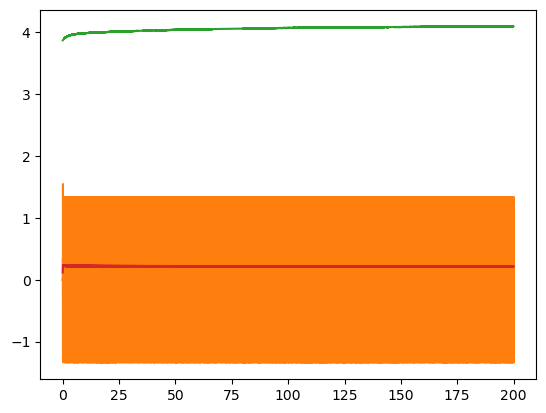

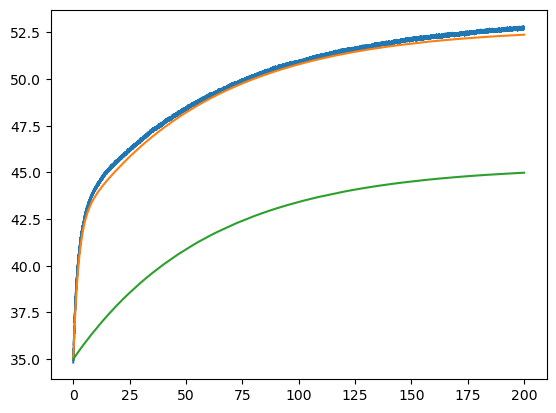

In [9]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    avg = ret[n:] - ret[:-n]
    return avg / n

x = np.linspace(0, samples / rate, samples)
plt.plot(x, i, label="i")
plt.plot(x, v, label="v")

window = rate // 6
vrms = np.sqrt(moving_average(v**2, window))
irms = np.sqrt(moving_average(i**2, window))
r = vrms / irms

plt.plot(x[:len(r)], r, label="r")

"""
# Woofer
rshunt = 0.09
rcal = 3.760 + rshunt
tcal = 27.21
tcf = 0.003624045
tc_vc = 3.05
rt_vc = 28.09
tc_mag = 192.45
rt_mag = 34.43
"""


# Tweeter
rshunt = 0.09
rcal = 3.688 + rshunt
tcal = 27.38
tcf = 0.003295384443954105
tc_vc = 2.31
rt_vc = 34.5
tc_mag = 61.4
rt_mag = 48.2



t0 = 35

base_samples = 500

rstart = np.mean(r[:5000])
rend = np.mean(r[-5000:])

t = ((r - rcal) / rcal) / tcf + tcal

off = - np.mean(t[:5000]) + t0
#off = 0

t = t + off

t0 = np.mean(t[:5000])

p = np.mean(v * i)
pmv = moving_average(v * i, window)

print("Power:", p)
print("Vrms:", np.sqrt(np.mean(v**2)))
print("Irms:", np.sqrt(np.mean(i**2)))
print("Rstart:", rstart)
print("Rend:", rend)
print("Offset:", off)

#t0 = 30

time = samples / rate
step = 0.01
tmag = t0
tvc = t0

xmodel = np.linspace(0, time, int(time / step))
tvc_y = []
tmag_y = []

alpha_vc = step / (tc_vc + step)
alpha_mag = step / (tc_mag + step)

for ti in xmodel:
    idx = int(ti * rate)
    if idx < len(pmv):
        p = pmv[idx]

    tvc_tgt = tmag + p * rt_vc
    tvc = tvc_tgt * alpha_vc + tvc * (1 - alpha_vc)

    tmag_tgt = t0 + p * rt_mag
    tmag = tmag_tgt * alpha_mag + tmag * (1 - alpha_mag)

    tvc_y.append(tvc)
    tmag_y.append(tmag)

print("tvc:", tvc)
print("tmag:", tmag)
print("tvc_tgt:", tvc_tgt)
print("tmag_tgt:", tmag_tgt)

plt.plot(x[:len(pmv)], pmv, label="power")

#plt.legend()
plt.show()

plt.plot(x[:len(r)], t, label="t")
plt.plot(xmodel, tvc_y, label="tvc")
plt.plot(xmodel, tmag_y, label="tmag")

#plt.legend()
plt.show()
